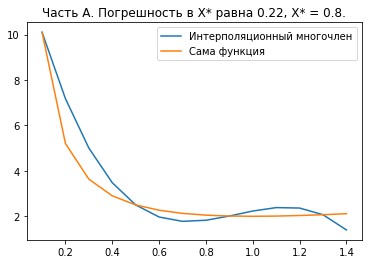

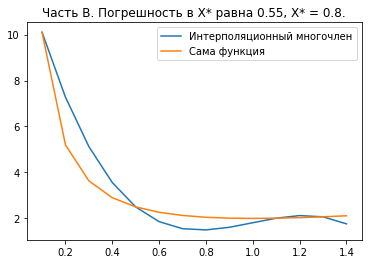

Часть А
[0.1, 0.5, 0.9, 1.3]
погрешность в X* равна 0.22435897435897312
x: 0.1, err:0.0
x: 0.2, err:1.9743589743589745
x: 0.30000000000000004, err:1.367521367521368
x: 0.4, err:0.5769230769230766
x: 0.5, err:8.881784197001252e-16
x: 0.6000000000000001, err:0.2991452991452981
x: 0.7000000000000001, err:0.35164835164835173
x: 0.8, err:0.22435897435897312
x: 0.9, err:1.7763568394002505e-15
x: 1.0, err:0.23076923076923084
x: 1.1, err:0.37296037296037454
x: 1.2000000000000002, err:0.329059829059831
x: 1.3, err:2.6645352591003757e-15
x: 1.4000000000000001, err:0.7142857142857122




Часть B
[0.1, 0.5, 1.1, 1.3]
погрешность в X* равна 0.5506993006992986
x: 0.1, err:0.0
x: 0.2, err:2.0769230769230766
x: 0.30000000000000004, err:1.491841491841492
x: 0.4, err:0.6608391608391604
x: 0.5, err:8.881784197001252e-16
x: 0.6000000000000001, err:0.4079254079254069
x: 0.7000000000000001, err:0.575424575424575
x: 0.8, err:0.5506993006992986
x: 0.9, err:0.39782439782439516
x: 1.0, err:0.18881118881118653
x

In [2]:
#    М30-321Б-18
#   Михаил Баландин
#	9 вариант



from matplotlib import pyplot as plt
import math

Xa = [0.1, 0.5, 0.9, 1.3]
Xb = [0.1, 0.5, 1.1, 1.3]

Xasterisk = 0.8  # для проверки погрешности в этой точке 


def my_func(x):
    return 1/x + x


def differences(func, points):

    first_level_diffs = [[func(point)] for point in points]
    second_level_diffs = []
    for i in range(len(first_level_diffs) - 1):
        numerator = first_level_diffs[i + 1][0] - first_level_diffs[i][0]
        denominator = points[i + 1] - points[i]
        new_diff = numerator / denominator
        second_level_diffs.append([new_diff, points[i + 1], points[i]])
    divided_diffs = [first_level_diffs, second_level_diffs]

    while len(divided_diffs) != len(points):
        next_level_diffs = []

        for i in range(len(divided_diffs[-1]) - 1):
            prev_level = divided_diffs[-1]
            numerator = prev_level[i + 1][0] - prev_level[i][0]
            denominator = prev_level[i + 1][1] - prev_level[i][2]
            new_diff = numerator / denominator
            next_level_diffs.append([new_diff, prev_level[i + 1][1], prev_level[i][2]])

        divided_diffs.append(next_level_diffs)
    divided_diffs = list(map(lambda x: x[0][0], divided_diffs))

    return divided_diffs


def products(points, x):
    products = [1]
    product = 1
    for i in range(len(points)-1):
        product *= x - points[i]
        products.append(product)
    return products


def newton_pol(func, points, x):
    parts = list(zip(differences(func, points), products(points, x)))
    res = 0
    for part in parts:
        res += part[0] * part[1]
    return res


work_with = Xa
xs = [0.1*x for x in range(1, 15)]
my_ys = [newton_pol(my_func, work_with, x) for x in xs]
true_ys = [my_func(x) for x in xs]

plt.plot(xs, my_ys, label='Интерполяционный многочлен')
plt.plot(xs, true_ys, label='Cама функция')
plt.legend()
error = abs(newton_pol(my_func, work_with, Xasterisk) - my_func(Xasterisk))
plt.title(f'Часть А. Погрешность в X* равна {round(error, 2)}, X* = {Xasterisk}.')
plt.show()


work_with = Xb
xs = [0.1*x for x in range(1, 15)]
my_ys = [newton_pol(my_func, work_with, x) for x in xs]
true_ys = [my_func(x) for x in xs]

plt.plot(xs, my_ys, label='Интерполяционный многочлен')
plt.plot(xs, true_ys, label='Cама функция')
plt.legend()
error = abs(newton_pol(my_func, work_with, Xasterisk) - my_func(Xasterisk))
plt.title(f'Часть B. Погрешность в X* равна {round(error, 2)}, X* = {Xasterisk}.')
plt.show()

print('Часть А')
work_with = Xa
print(work_with)
error = abs(newton_pol(my_func, work_with, Xasterisk) - my_func(Xasterisk))
print(f'погрешность в X* равна {error}')

for x in [0.1*i for i in range(1, 15)]:
    err = abs(newton_pol(my_func, work_with, x) - my_func(x))
    print(f'x: {x}, err:{err}')

print('\n\n\n\nЧасть B')
work_with = Xb
print(work_with)
error = abs(newton_pol(my_func, work_with, Xasterisk) - my_func(Xasterisk))
print(f'погрешность в X* равна {error}')

for x in [0.1*i for i in range(1, 15)]:
    err = abs(newton_pol(my_func, work_with, x) - my_func(x))
    print(f'x: {x}, err:{err}')
